In [1]:
%matplotlib inline
import numpy as np
import lsst.sims.featureScheduler as fs
from lsst.sims.speedObservatory import Speed_observatory
import healpy as hp
import matplotlib.pylab as plt

In [2]:
survey_length = 20  # days
# Define what we want the final visit ratio map to look like
target_map = fs.standard_goals()['r']

bfs = []
bfs.append(fs.Depth_percentile_basis_function())
bfs.append(fs.Target_map_basis_function(target_map=target_map))
bfs.append(fs.Quadrant_basis_function())
bfs.append(fs.Slewtime_basis_function())

weights = np.array([.5,1.,  1., 1.])
survey = fs.Simple_greedy_survey_fields(bfs, weights, block_size=10)
scheduler = fs.Core_scheduler([survey])

observatory = Speed_observatory()
observatory, scheduler, observations = fs.sim_runner(observatory, scheduler,
                                                     survey_length=survey_length)

/Users/yoachim/gitRepos/sims_ocs/python/lsst/sims/ocs/environment/seeing_model.py:61: RuntimeWarning: invalid value encountered in power
  airmass_correction = numpy.power(airmass, self.AIRMASS_CORRECTION_POWER)
/Users/yoachim/gitRepos/sims_featureScheduler/python/lsst/sims/featureScheduler/surveys.py:284: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  reward_fields[np.where(reward_fields.mask == True)] = -np.inf


progress = 45.1%

/Users/yoachim/gitRepos/sims_skybrightness_pre/python/lsst/sims/skybrightness_pre/SkyModelPre.py:284: UserWarning: Requested MJD between sunrise and sunset, returning closest maps
  warnings.warn('Requested MJD between sunrise and sunset, returning closest maps')
/Users/yoachim/gitRepos/sims_skybrightness_pre/python/lsst/sims/skybrightness_pre/SkyModelPre.py:200: UserWarning: Requested MJD between sunrise and sunset, returning closest maps
  warnings.warn('Requested MJD between sunrise and sunset, returning closest maps')


progress = 100.0%Completed 12375 observations


In [3]:
observatory.mjd

59600.038194407156

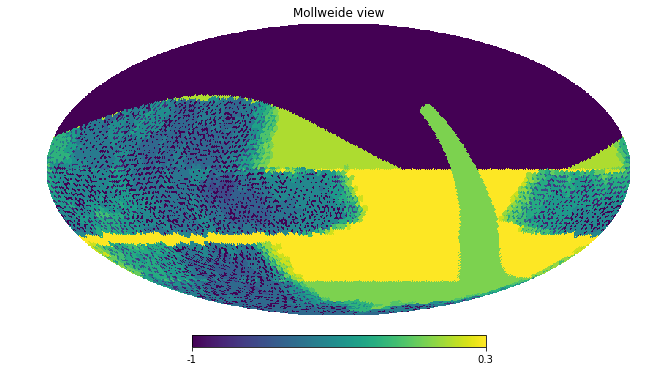

In [4]:
hp.mollview(scheduler.surveys[0].basis_functions[1](), min=-1)

In [5]:
scheduler.surveys[0].basis_functions[3]()

1.0